<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/Keras/CNN_image_classification(%EC%83%9D%ED%99%9C%EC%BD%94%EB%94%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 출력

In [ ]:
import tensorflow as tf

In [ ]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)
 
(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

(60000, 28, 28) (60000,)
170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)


1. 화면 출력

5


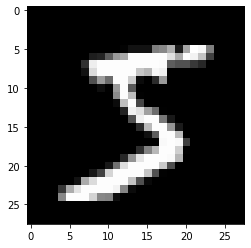

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mnist_x[0], cmap='gray');
print(mnist_y[0])

[6]


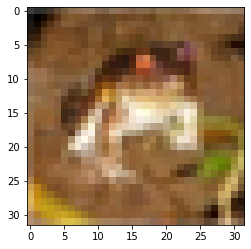

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cifar_x[0], cmap='gray');
print(cifar_y[0])

2. 차원 확인

In [ ]:
import numpy as np

d1 = np.array([1,2,3,4,5])
print(d1.shape)

d2 = np.array([d1,d1,d1,d1])
print(d2.shape)

d3 = np.array([d2,d2,d2])
print(d3.shape)

d4 = np.array([d3,d3])
print(d4.shape)

(5,)
(4, 5)
(3, 4, 5)
(2, 3, 4, 5)


In [ ]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [ ]:
x1 = np.array([1,2,3,4,5])
print(x1.shape)
print(mnist_y[0:5])
print(mnist_y[0:5].shape)
print()

x2 = np.array([[1,2,3,4,5]])
print(x2.shape)
print()

x3 = np.array([[1], [2], [3], [4], [5]])
print(x3.shape)
print(cifar_y[0:5])
print(cifar_y[0:5].shape)

(5,)
[5 0 4 1 9]
(5,)

(1, 5)

(5, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]
(5, 1)


# Flatten Layer

In [ ]:
import tensorflow as tf
import pandas as pd

## with reshape

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

독립 = 독립.reshape(60000, 784)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


In [ ]:
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(84, activation='swish') (X)
Y = tf.keras.layers.Dense(10, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3267 - accuracy: 0.8542
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6146 - accuracy: 0.9172
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5043 - accuracy: 0.9308
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4406 - accuracy: 0.9378
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4016 - accuracy: 0.9453
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3915 - accuracy: 0.9480
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.9503
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3582 - accuracy: 0.9539
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.9566
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.336

In [ ]:
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # 좀 더 예쁘게 표현

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


## with Flatten

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)


In [ ]:
X = tf.keras.layers.Input(shape=[28,28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84, activation='swish') (H)
Y = tf.keras.layers.Dense(10, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7412 - accuracy: 0.8522
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5459 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4635 - accuracy: 0.9305
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4422 - accuracy: 0.9386
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4130 - accuracy: 0.9419
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3991 - accuracy: 0.9432
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3917 - accuracy: 0.9464
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3697 - accuracy: 0.9470
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.9491
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.345

In [ ]:
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2) # 좀 더 예쁘게 표현

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


# Convolution Layer
특징 자동 추출기라고 생각해보자

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

독립 = 독립.reshape(60000, 28, 28, 1) # 흑백 이미지지만 컬러처럼 3차원으로 변환
종속 = pd.get_dummies(종속) # 원핫인코딩
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [ ]:
X = tf.keras.layers.Input(shape=[28,28,1]) # 3차원으로 받아야 합성곱으로 input 가능
H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation='swish') (H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3211 - accuracy: 0.9305
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0781 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0517 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0354 - accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0224 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0190 - accuracy: 0.9946
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0186 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0166 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.013

In [ ]:
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten_4 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 84)                201684    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_____________________________________________________

# Pooling LAyer

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

독립 = 독립.reshape(60000, 28, 28, 1) # 흑백 이미지지만 컬러처럼 3차원으로 변환
종속 = pd.get_dummies(종속) # 원핫인코딩
print(독립.shape, 종속.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [ ]:
X = tf.keras.layers.Input(shape=[28,28,1]) # 3차원으로 받아야 합성곱으로 input 가능

H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation='swish') (H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten (Flatten)            (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 84)                8148  

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 3ms/step - loss: 0.5821 - accuracy: 0.8837
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1374 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1037 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0805 - accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9790
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9798
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9808
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

# Lenet-5

## Mnist

In [54]:
import tensorflow as tf
import pandas as pd

In [55]:
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

독립 = 독립.reshape(60000, 28, 28, 1) # 흑백 이미지지만 컬러처럼 3차원으로 변환
종속 = pd.get_dummies(종속) # 원핫인코딩
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [59]:
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [60]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2494 - accuracy: 0.9385
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0852 - accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0648 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0635 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0613 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0681 - accuracy: 0.9857
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0626 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0655 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.06

In [61]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 120)               4812

## Cifar 10

In [62]:
# 데이터를 준비합니다. 
(독립, 종속), _ = tf.keras.datasets.cifar10.load_data()
print(독립.shape, 종속.shape)

종속 = pd.get_dummies(종속.reshape(50000))
print(독립.shape, 종속.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [63]:
# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [64]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9161 - accuracy: 0.3157
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5751 - accuracy: 0.4361
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4621 - accuracy: 0.4838
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3936 - accuracy: 0.5106
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3480 - accuracy: 0.5307
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3169 - accuracy: 0.5465
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3004 - accuracy: 0.5524
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2849 - accuracy: 0.5588
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2746 - accuracy: 0.5624
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.272

In [65]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 120)               4812